## 데이터 전처리

In [ ]:
import pandas as pd
import numpy as np
import string
import re

## NLTK stopwords
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [2]:
# stopwords
def set_stop_words():
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu',
    'use', 'not', 'would', 'say', 'could', '_', 'be', 'know',
    'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some',
    'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily',
    'lot', 'lack', 'make', 'want', 'seem', 'run', 'need',
    'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come',
    'app', 'non'])
    
    return stop_words
stop_words = set_stop_words()

In [3]:
def preprocess_text(text_data, get_lemma=True, tags=(), stop_words=[]):
    # 소문자 변경
    text_data = text_data.lower()
    # URL 제거
    text_data = re.sub(r'((www.\S+)|(https?://\S+))', r"", text_data)
    # HTML 태그 제거
    text_data = re.sub(r'<[^>]+>', r'', text_data)
    # 숫자 제거
    text_data = re.sub(r'[0-9]\S+', r'', text_data)
    # 문장부호 제거
    text_data = [char for char in text_data if char not in string.punctuation]
    text_data = "".join(text_data)
    # 금지어 제거
    text_data = [word for word in text_data.split() if word.lower() not in stop_words]
    text_data = " ".join(text_data)
    # 래마타이즈
    if get_lemma == True:
        text_data = [lemmatizer.lemmatize(word) for word in text_data.split()]
        text_data = " ".join(text_data)
    # POS 필터
    if len(tags) > 0:
        text_data = [word for word, pos in nltk.pos_tag(nltk.word_tokenize(text_data)) if
                     pos.startswith(tags)]
        text_data = " ".join(text_data)
    
    return text_data

In [4]:
# 데이터 불러오기
file_name = "Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.shape

(23486, 11)

In [6]:
df2 = df.dropna(subset=['Review Text'])
df2.shape

(22641, 11)

In [7]:
data = df2.copy()

In [8]:
TAGS = ('JJ', 'NN', 'RB', 'VB')

In [9]:
data['Review Text2'] = data['Review Text'].apply(lambda x: preprocess_text(x, get_lemma=True, tags=TAGS, stop_words=stop_words))

In [10]:
data['Review Text2']

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ti...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price slip flattering c...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top never worked im glad able store d...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fit perfectly w...
Name: Review Text2, Length: 22641, dtype: object

In [11]:
import gensim

def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)

In [12]:
# Convert to list
dataset = data['Review Text2'].values.tolist()
data_words = list(sent_to_words(dataset))
print(data_words[:1])

[['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable']]


## LDA Modeling

In [13]:
# import packages for LDA
import gensim
import logging
import warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Library for visualization
import matplotlib.pyplot as plt

In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
# higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [15]:
bigram.export_phrases()

{'tracy_reese': 6149.393939393939,
 'foot_tall': 108.95927420737912,
 'lower_half': 120.09152830991911,
 'hourglass_figure': 133.73052959501558,
 'average_height': 138.34357841967056,
 'took_chance': 285.04582651391166,
 'form_fitting': 406.9405864197531,
 'others_mentioned': 138.37484170536092,
 'dry_cleaned': 447.99107142857144,
 'month_ago': 216.65124555160142,
 'added_bonus': 335.25468587296075,
 'pilcro_stet': 199.45663397005677,
 'reasonably_priced': 1006.11328125,
 'visual_interest': 1396.436746987952,
 'cowl_neck': 206.72577288941736,
 'elastic_waistband': 149.03132075471697,
 'cant_wait': 164.7727443778788,
 'wish_list': 122.38103070175438,
 'couldve_gotten': 120.80909943714822,
 'football_player': 5365.9375,
 'cami_underneath': 109.89607460685114,
 'baby_doll': 1015.101156069364,
 'body_type': 118.72181548602201,
 'last_week': 106.23759468039897,
 'cold_water': 614.7641975308642,
 'burnt_orange': 358.84096024006,
 'real_life': 838.5837209302326,
 'caught_eye': 714.77515516829

In [16]:
trigram.export_phrases()

{'tracy_reese': 1695460.0,
 'foot_tall': 165.49909971705392,
 'lower_half': 159.45036544850498,
 'hourglass_figure': 221.1289297068174,
 'average_height': 176.34915865384616,
 'took_chance': 784.8968001695274,
 'form_fitting': 2052.981086028066,
 'others_mentioned': 405.96160972356034,
 'dry_cleaned': 3518.525179856115,
 'month_ago': 4176.009852216749,
 'someone_else': 129.30074046534685,
 'added_bonus': 547.6763717805152,
 'pilcro_stet': 395.2121212121212,
 'reasonably_priced': 5016.153846153847,
 'lot_compliment': 109.60603721807735,
 'visual_interest': 10296.315789473683,
 'cowl_neck': 549.4367295990014,
 'warmer_climate': 111.32735808792147,
 'elastic_waistband': 206.28980125163332,
 'cant_wait': 694.2230015342706,
 'wish_list': 316.0812826249068,
 'couldve_gotten': 163.84422110552765,
 'football_player': 104336.0,
 'cami_underneath': 207.6807172487622,
 'baby_doll': 16578.813559322032,
 'body_type': 340.59444725545563,
 'last_week': 243.56876061120542,
 'cold_water': 2271.57957957

In [17]:
def process_words(texts):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    return texts

In [18]:
# Prepare documents for Gensim Modeling
documents = process_words(data_words)

In [19]:
documents[5]

['love',
 'tracy_reese',
 'dress',
 'petite',
 'foot_tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress']

In [20]:
# Create Dictionary
dictionary = corpora.Dictionary(documents)
for i in range(0, 10):
    print(dictionary[i])

absolutely
comfortable
sexy
silky
wonderful
bc
bought
definitely
dress
find


In [21]:
print('dictionary size:',  len(dictionary))

dictionary size: 16503


## Counter Based Filtering

In [22]:
# Counter Based Filtering
from collections import Counter

min_count = 20
word_counter = Counter((word for words in documents for word in words))
removal_word_idxs = {
    dictionary.token2id[word] for word, count in word_counter.items() if count < min_count
}

dictionary.filter_tokens(removal_word_idxs)
dictionary.compactify()
print('dictionary size:', len(dictionary))

dictionary size: 2086


## Create Corpus

In [23]:
# Create Corpus: Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in documents]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [24]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=4, 
                                       random_state=1969,
                                       per_word_topics=True)

In [25]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.029*"dress" + 0.023*"love" + 0.017*"fit" + 0.015*"great" + 0.015*"look" + '
  '0.014*"size" + 0.013*"color" + 0.012*"wear" + 0.012*"fabric" + '
  '0.010*"flattering"'),
 (1,
  '0.034*"top" + 0.023*"fit" + 0.016*"color" + 0.014*"great" + 0.014*"size" + '
  '0.013*"dress" + 0.012*"small" + 0.012*"love" + 0.011*"wear" + 0.009*"look"'),
 (2,
  '0.024*"size" + 0.023*"fit" + 0.020*"dress" + 0.016*"love" + 0.016*"im" + '
  '0.014*"color" + 0.014*"look" + 0.012*"wear" + 0.011*"top" + 0.011*"great"'),
 (3,
  '0.023*"dress" + 0.017*"size" + 0.015*"look" + 0.014*"love" + 0.013*"fabric" '
  '+ 0.011*"soft" + 0.011*"fit" + 0.011*"top" + 0.011*"little" + 0.010*"im"')]


random_state 고정시켜도 머신마다 다르게 나옴  
걍 신경 ㄴ

## LDA 시각화

In [26]:
## Topic Modeling results per document
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                new_row = pd.DataFrame([int(topic_num), round(prop_topic,4), topic_keywords]).T
                sent_topics_df = pd.concat([new_row, sent_topics_df.loc[:]]).reset_index(drop=True)
            else:
                break
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']

    return(sent_topics_df)

In [27]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=documents)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.9104,"size, fit, dress, love, im, color, look, wear,...","[absolutely, wonderful, silky, sexy, comfortable]"
1,1,2,0.9739,"size, fit, dress, love, im, color, look, wear,...","[love, dress, sooo, pretty, happened, find, st..."
2,2,0,0.5183,"dress, love, fit, great, look, size, color, we...","[high, hope, dress, really, wanted, work, init..."
3,3,3,0.9648,"dress, size, look, love, fabric, soft, fit, to...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,4,0,0.9276,"dress, love, fit, great, look, size, color, we...","[shirt, flattering, due, adjustable, front, ti..."


In [28]:
# Most representative document for each topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                            grp.sort_values(['Perc_Contribution'], 
                                            ascending=False).head(1)], 
                                            axis=0)
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9829,"dress, love, fit, great, look, size, color, we...","[weave, loose, chunky, isnt, apparent, picture..."
1,1,0.9847,"top, fit, color, great, size, dress, small, lo...","[worn, boot, sandal, multi, season, dress, com..."
2,2,0.9831,"size, fit, dress, love, im, color, look, wear,...","[glad, went, buy, store, surprised, texture, m..."
3,3,0.9826,"dress, size, look, love, fabric, soft, fit, to...","[absolutely, love, sweater, soft, wash, look, ..."


In [29]:
def get_most_representative_docs(df_dominant_topic):
    sent_topics_sorteddf_mallet = pd.DataFrame()
    sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
    for i, grp in sent_topics_outdf_grpd:
      sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                            grp.sort_values(['Perc_Contribution'], 
                                            ascending=False).head(1)], 
                                            axis=0)
    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
    sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

    sent_topics_sorteddf_mallet
    
    return sent_topics_sorteddf_mallet

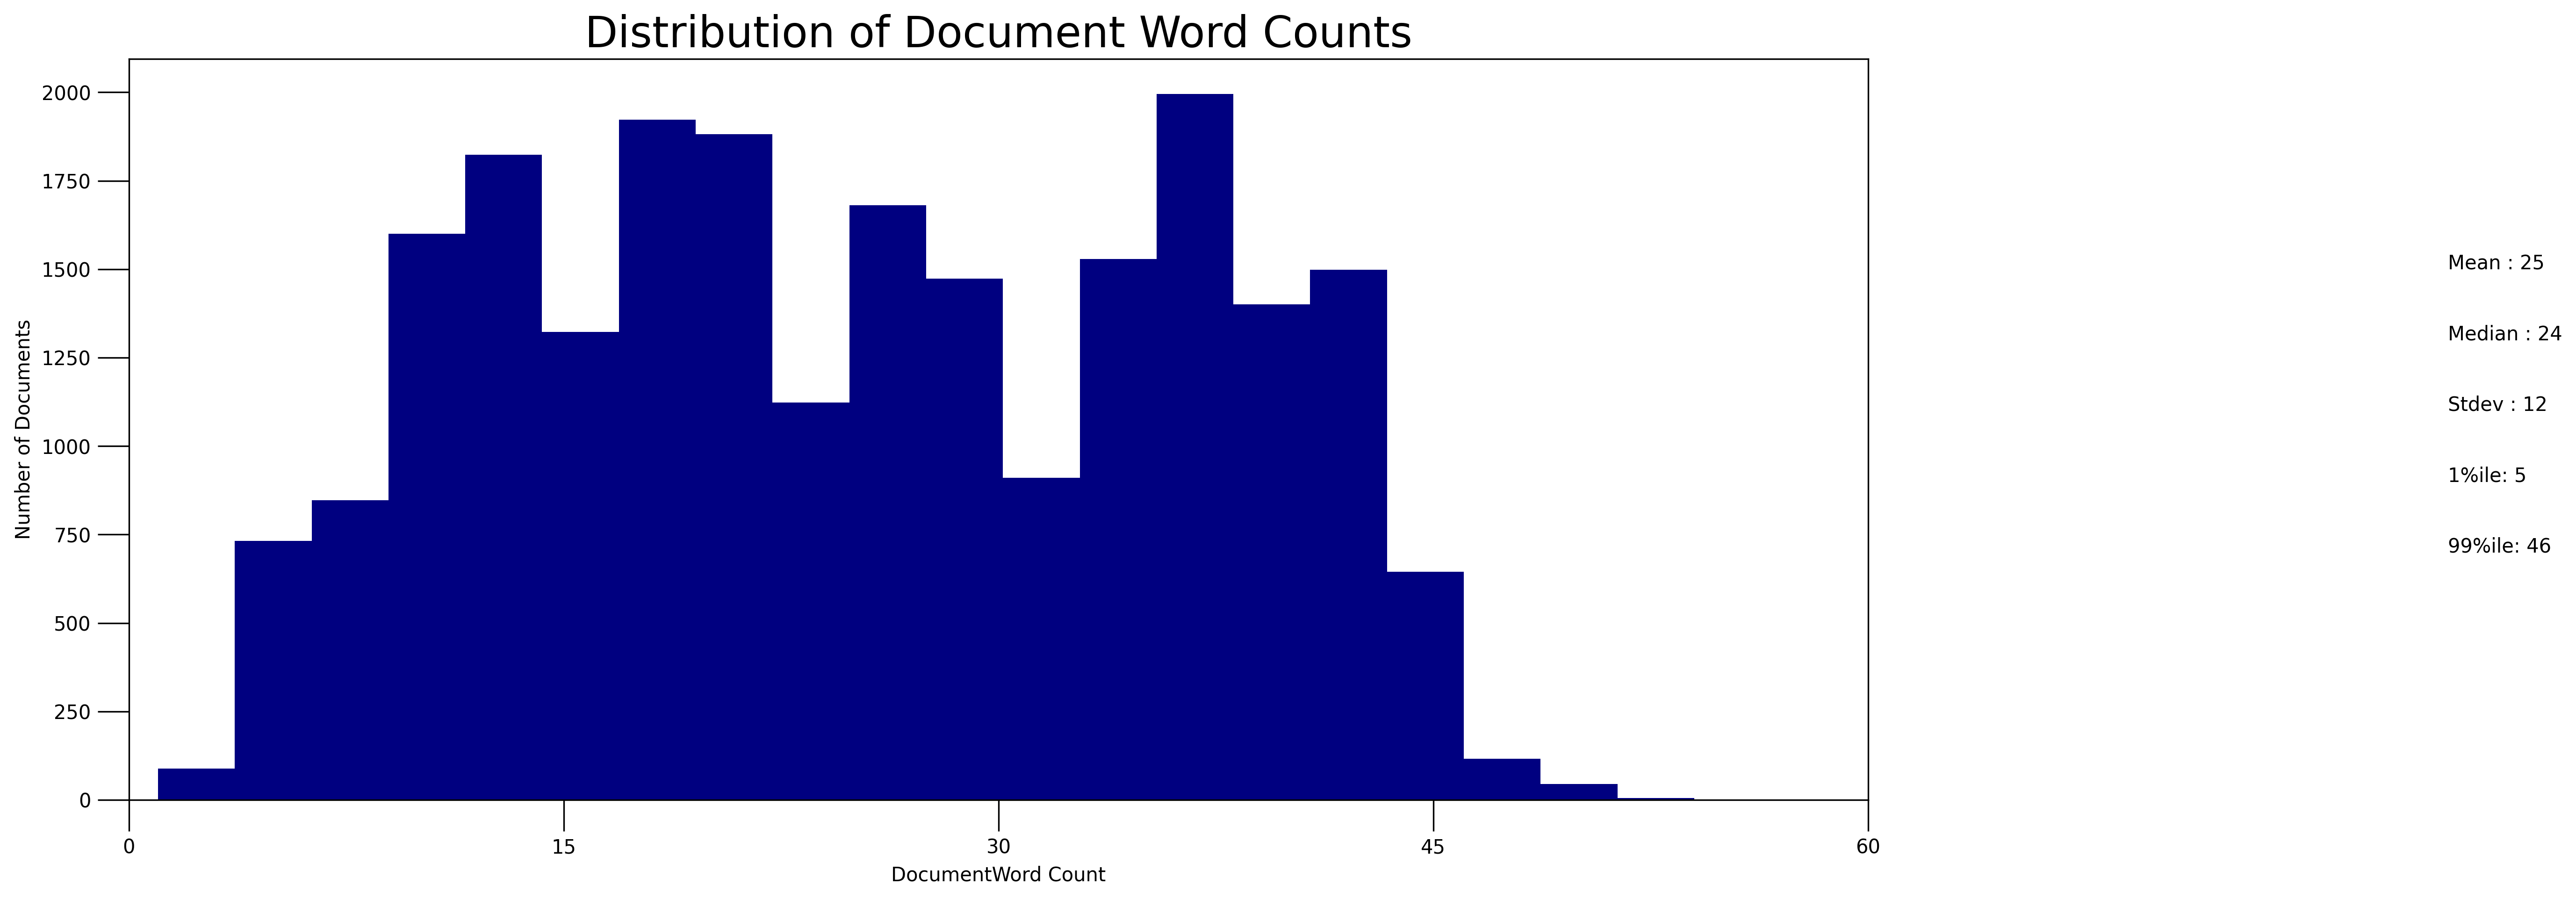

In [30]:
# Frequency Distribution of Word Counts in Documents
doc_lens = [len(d) for d in df_dominant_topic.Text]
plt.figure(figsize=(16,7), dpi=300)
plt.hist(doc_lens, bins = 20, color='navy')
plt.text(80, 1500, "Mean : " + str(round(np.mean(doc_lens))))
plt.text(80, 1300, "Median : " + str(round(np.median(doc_lens))))
plt.text(80, 1100, "Stdev : " + str(round(np.std(doc_lens))))
plt.text(80, 900, "1%ile: " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(80, 700, "99%ile: " + str(round(np.quantile(doc_lens, q=0.99))))
plt.gca().set(xlim=(0, 50), ylabel='Number of Documents', xlabel='DocumentWord Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,60,5))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

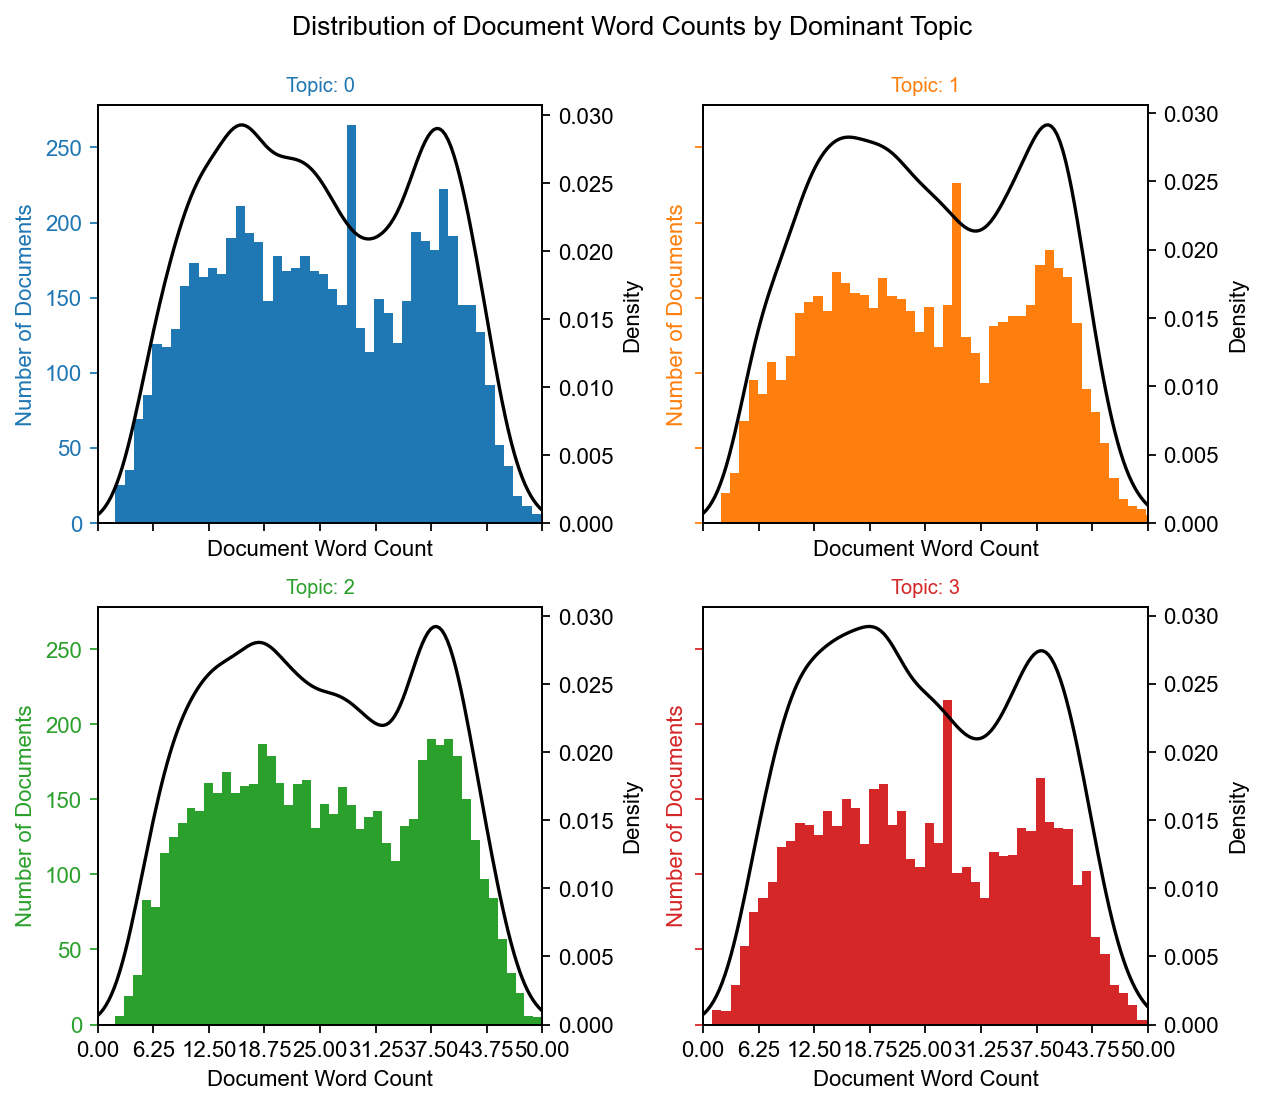

In [31]:
import matplotlib
import seaborn as sns
import matplotlib.colors as mcolors
font = {'family' : 'Arial', 'weight' : 'normal', 'size': 10}
matplotlib.rc('font', **font)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] # more colors:
'mcolors.XKCD_COLORS'
fig, axes = plt.subplots(2,2,figsize=(8,7), dpi=160, sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 50, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", fill=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=9, color=cols[i]))
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic',
fontsize=12)
plt.show()

ValueError: Only supported for TrueType fonts

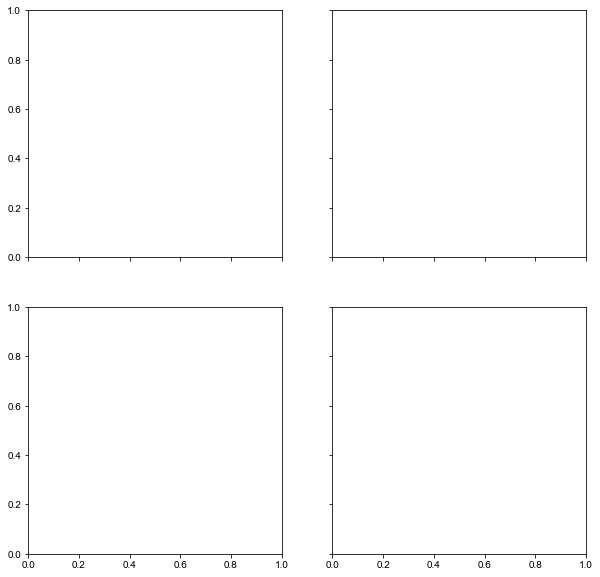

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=stop_words, background_color='white', width=2500, height=1800, max_words=30, colormap='tab10', color_func=lambda *args, **kwargs: cols[i], prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()